## IPython and Plotly: A Rosetta Stone for MATLAB,<br>R, Python, and Excel plotting 

Collaboration, data analysis, and data visualization sometimes feels like this:

In [1]:
from IPython.display import Image
Image(url = 'https://i.imgur.com/4DrMgLI.png')

Graphing and data analysis need a Rosetta Stone to solve the fragmentation and collaboration problem. 
Plotly is about bridging the divide and serving as an interoperable platform for analysis and plotting. You can import, edit, and plot data using scripts and data from Python, MATLAB, R, Julia, Perl, REST, Arduino, Raspberry Pi, or Excel. So can your team. 

*All in the same online plot*.

Read on to learn more, or run `$ pip install plotly` and copy and paste the code below. Plotly is online, meaning no downloads or installations necessary. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import numpy as np

You can use our key, or [sign-up](https://plot.ly/ssi) to get started. It's free for any public sharing and you own your data, so you can make and share as many plots as you want.

In [3]:
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
py.sign_in("IPython.Demo", "1fw3zw2o13")

In [4]:
import plotly
plotly.__version__

'1.0.12'

## I. shareable matplotlib figures

Let's start out with a matplotlib example. We also have [a user guide section](https://plot.ly/python/matplotlib-to-plotly-tutorial/) on the subject.

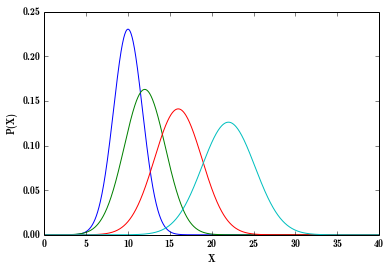

In [5]:
fig1 = plt.figure()

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

mean = [10,12,16,22,25]
variance = [3,6,8,10,12]

x = np.linspace(0,40,1000)

for i in range(4):
    sigma = np.sqrt(variance[i])
    y = mlab.normpdf(x,mean[i],sigma)
    plt.plot(x,y, label=r'$v_{}$'.format(i+1))

plt.xlabel("X")
plt.ylabel("P(X)")        

To re-create the graph in Plotly and use Plotly's defaults, call `iplot` and add `strip_style`.

In [6]:
py.iplot_mpl(fig1, strip_style = True)

It's shareable at a URL, contains the data as part of the plot, and can be edited collaboratively from any API or our web app. Head over to [Plotly's API](https://plot.ly/api) to see more, and check out our [user guide](https://plot.ly/python/user-guide/) to see how it all works. 

Plotly also jointly preserves the data in a graph, the graph, and the graph description (in this case JSON). That's valuable. [One study](http://www.smithsonianmag.com/science-nature/the-vast-majority-of-raw-data-from-old-scientific-studies-may-now-be-missing-180948067/?no-ist) in *current biology* found that over 90 percent of data from papers published over the past 20 years was not available. So sharing data is good for science and reproducibility, useful for your projects, and great for collaboration.

## II. ggplot2 plots in Plotly

Let's take a real-world look storing data and graphs together. Suppose you see a graph on the [World Bank website](http://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata). The graph uses [ggplot2](http://ggplot2.org), a remarkable plotting library for R. 

In [7]:
from IPython.display import Image
Image(url = 'http://i.imgur.com/PkRRmHq.png')

You would like to re-make the graph and analyze and share the data. Getting the data using Plotly is easy. You can run the ggplot2 script in RStudio. Here we're running it using the new [R kernel](https://github.com/takluyver/IRkernel) for IPython). The Notebook with the replicable code and installation is [here](http://nbviewer.ipython.org/gist/msund/403910de45e282d658fa). 

In [8]:
library(WDI)
library(ggplot2)
 
#Grab GNI per capita data for Chile, Hungary and Uruguay
 
dat = WDI(indicator='NY.GNP.PCAP.CD', country=c('CL','HU','UY'), start=1960, end=2012)
 
#a quick plot with legend, title and label
 
wb <- ggplot(dat, aes(year, NY.GNP.PCAP.CD, color=country)) + geom_line() 
+     xlab('Year') + ylab('GDI per capita (Atlas Method USD)') 
+     labs(title <- "GNI Per Capita ($USD Atlas Method)")

ggplotly(wb)

We can add `ggplotly` to the call, which will draw the figure with Plotly's [R API](https://plot.ly/r). Then we can call it in a Notebook. You can similarly call any Plotly graph with the username and graph id pair.

In [9]:
tls.embed('RgraphingAPI', '1457')

Note: the data is called from a WDI database; if you make it with Plotly, the data is stored with the plot. I forked the data and shared it: [https://plot.ly/~MattSundquist/1343](https://plot.ly/~MattSundquist/1343). 

If you want to use Plotly's default graph look, you can edit the graph with Python.

In [10]:
fig = py.get_figure('RgraphingAPI', '1457')
fig.strip_style()
py.iplot(fig)

Often we come to a visualization with data rather than coming to data with a visualization. In that case, Plotly is useful for quick exploration, with matplotlib or Plotly's API.

In [11]:
my_data = py.get_figure('PythonAPI', '455').get_data()

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
fig1 = plt.figure()

plt.subplot(311)
plt.plot(my_data[0]['x'], my_data[0]['y'])
plt.subplot(312)
plt.plot(my_data[1]['x'], my_data[1]['y'])
plt.subplot(313)
plt.plot(my_data[2]['x'], my_data[2]['y'])

py.iplot_mpl(fig1, strip_style = True)

You can also draw the graph [with subplots](https://plot.ly/python/subplots/) in Plotly.

In [14]:
my_data[1]['yaxis'] = 'y2'
my_data[2]['yaxis'] = 'y3'

layout = Layout(
    yaxis=YAxis(
        domain=[0, 0.33]
    ),
    legend=Legend(
        traceorder='reversed'
    ),
    yaxis2=YAxis(
        domain=[0.33, 0.66]
    ),
    yaxis3=YAxis(
        domain=[0.66, 1]
    )
)

fig = Figure(data=my_data, layout=layout)

py.iplot(fig)

Then maybe I want to edit it quickly with a GUI, without coding. I click through to the graph in the "data and graph" link, fork my own copy, and can switch between graph types, styling options, and more.

In [15]:
Image(url = 'http://i.imgur.com/rHP53Oz.png')

Now, having re-styled it, we can call the graph back into the NB, and if we want, get the figure information for the new, updated graph. The graphs below are meant to show the flexibility available to you in styling from the GUI.

In [16]:
tls.embed('MattSundquist', '1404')

In [17]:
tls.embed('MattSundquist', '1339')

We can also get the data in a grid, and run stats, fits, functions, add error bars, and more. Plotly keeps data and graphs together. 

In [18]:
Image(url = 'http://i.imgur.com/JJkNPJg.png')

And there we have it. A reproducible figure, drawn with D3 that includes the plot, data, and plot structure. And you can easily call that figure or data as well. Check to see what URL it is by hoving on "data and graph" and then call that figure.

In [19]:
ggplot = py.get_figure('MattSundquist', '1339') 

In [20]:
ggplot #print it

{'data': [{'line': {'color': 'rgb(31, 119, 180)', 'width': 4},
   'mode': 'lines',
   'name': 'Chile',
   'type': 'scatter',
   'x': [1960,
    1961,
    1962,
    1963,
    1964,
    1965,
    1966,
    1967,
    1968,
    1969,
    1970,
    1971,
    1972,
    1973,
    1974,
    1975,
    1976,
    1977,
    1978,
    1979,
    1980,
    1981,
    1982,
    1983,
    1984,
    1985,
    1986,
    1987,
    1988,
    1989,
    1990,
    1991,
    1992,
    1993,
    1994,
    1995,
    1996,
    1997,
    1998,
    1999,
    2000,
    2001,
    2002,
    2003,
    2004,
    2005,
    2006,
    2007,
    2008,
    2009,
    2010,
    2011,
    2012],
   'y': [None,
    None,
    600,
    640,
    660,
    650,
    740,
    760,
    770,
    800,
    860,
    1020,
    1110,
    1320,
    1620,
    1120,
    980,
    1070,
    1320,
    1740,
    2240,
    2640,
    2190,
    1780,
    1600,
    1410,
    1410,
    1560,
    1820,
    2090,
    2240,
    2490,
    3020,
    3330,
    

Want to analyze the data or use it for another figure?

In [21]:
ggplot_data = ggplot.get_data()

In [22]:
ggplot_data

{'data': [{'name': 'Chile',
   'x': [1960,
    1961,
    1962,
    1963,
    1964,
    1965,
    1966,
    1967,
    1968,
    1969,
    1970,
    1971,
    1972,
    1973,
    1974,
    1975,
    1976,
    1977,
    1978,
    1979,
    1980,
    1981,
    1982,
    1983,
    1984,
    1985,
    1986,
    1987,
    1988,
    1989,
    1990,
    1991,
    1992,
    1993,
    1994,
    1995,
    1996,
    1997,
    1998,
    1999,
    2000,
    2001,
    2002,
    2003,
    2004,
    2005,
    2006,
    2007,
    2008,
    2009,
    2010,
    2011,
    2012],
   'y': [None,
    None,
    600,
    640,
    660,
    650,
    740,
    760,
    770,
    800,
    860,
    1020,
    1110,
    1320,
    1620,
    1120,
    980,
    1070,
    1320,
    1740,
    2240,
    2640,
    2190,
    1780,
    1600,
    1410,
    1410,
    1560,
    1820,
    2090,
    2240,
    2490,
    3020,
    3330,
    3610,
    4320,
    4930,
    5380,
    5250,
    4910,
    4920,
    4760,
    4550,
    4570,
 

Want to use Python to analyze your data? You can read that data into a pandas DataFrame. 

In [23]:
import pandas as pd

In [24]:
my_data = py.get_figure('MattSundquist', '1339').get_data()
frames = {data['name']: {'x': data['x'], 'y': data['y']} for data in my_data['data']}
df = pd.DataFrame(frames)
df

,Chile,Hungary,Uruguay
x,"[1960, 1961, 1962, 1963, 1964, 1965, 1966, 196...","[1960, 1961, 1962, 1963, 1964, 1965, 1966, 196...","[1960, 1961, 1962, 1963, 1964, 1965, 1966, 196..."
y,"[None, None, 600, 640, 660, 650, 740, 760, 770...","[None, None, None, None, None, None, None, Non...","[None, None, 580, 610, 660, 680, 720, 640, 610..."


Plotly has interactive support that lets you call help on graph objects. Try `layout` or `data` too. For example.

In [25]:
from plotly.graph_objs import Data, Layout, Figure

In [26]:
help(Figure)

Help on class Figure in module plotly.graph_objs.graph_objs:

class Figure(PlotlyDict)
 |  A dictionary-like object representing a figure to be rendered in plotly.
 |  
 |      This is the container for all things to be rendered in a figure.
 |  
 |      For help with setting up subplots, run:
 |      `help(plotly.tools.get_subplots)`
 |  
 |      
 |  Quick method reference:
 |  
 |      Figure.update(changes)
 |      Figure.strip_style()
 |      Figure.get_data()
 |      Figure.to_graph_objs()
 |      Figure.validate()
 |      Figure.to_string()
 |      Figure.force_clean()
 |  
 |  Valid keys:
 |  
 |      data [required=False] (value=Data object | dictionary-like):
 |          A list-like array of the data that is to be visualized.
 |  
 |          For more, run `help(plotly.graph_objs.Data)`
 |  
 |      layout [required=False] (value=Layout object | dictionary-like):
 |          The layout dictionary-like object contains axes information, gobal
 |          settings, and layout in

## III. MATLAB, Julia, and Perl plotting with Plotly

We just made a plot with R using `ggplot2`, edited it in an IPython Notebook with Python, edited with our web app, shared it, and read the data into a pandas DataFrame. We have [another Notebook](nbviewer.ipython.org/gist/msund/11349097) that shows how to use Plotly with [seaborn](https://stanford.edu/~mwaskom/software/seaborn/tutorial.html), [prettyplotlib](https://github.com/olgabot/prettyplotlib), and [ggplot for Python](https://ggplot.yhathq.com/) Your whole team can now collaborate, regardless of technical capability or language of choice. This linguistic flexibility and technical interoperability powers collaboration, and it's what Plotly is all about. Let's jump into a few more examples.

Let's say you see some code and data for a [MATLAB gallery](http://www.mathworks.com/matlabcentral/fileexchange/35265-matlab-plot-gallery-log-log-plot/content/html/Loglog_Plot.html) plot you love and want to share.

In [27]:
Image(url = 'http://i.imgur.com/bGj8EzI.png?1')

You can use Plotly's [MATLAB API](https://plot.ly/MATLAB) to make a shareable plots, with LaTeX included. You run the MATLAB code in your MATLAB environrment or the [MATLAB kernel](https://github.com/ipython/ipython/wiki/Extensions-Index#matlab) in IPython and add `fig2plotly` to the call. Check out the [user guide](https://plot.ly/matlab/user-guide/) to see the installation and setup.

https://plot.ly/~MATLAB-demos/4


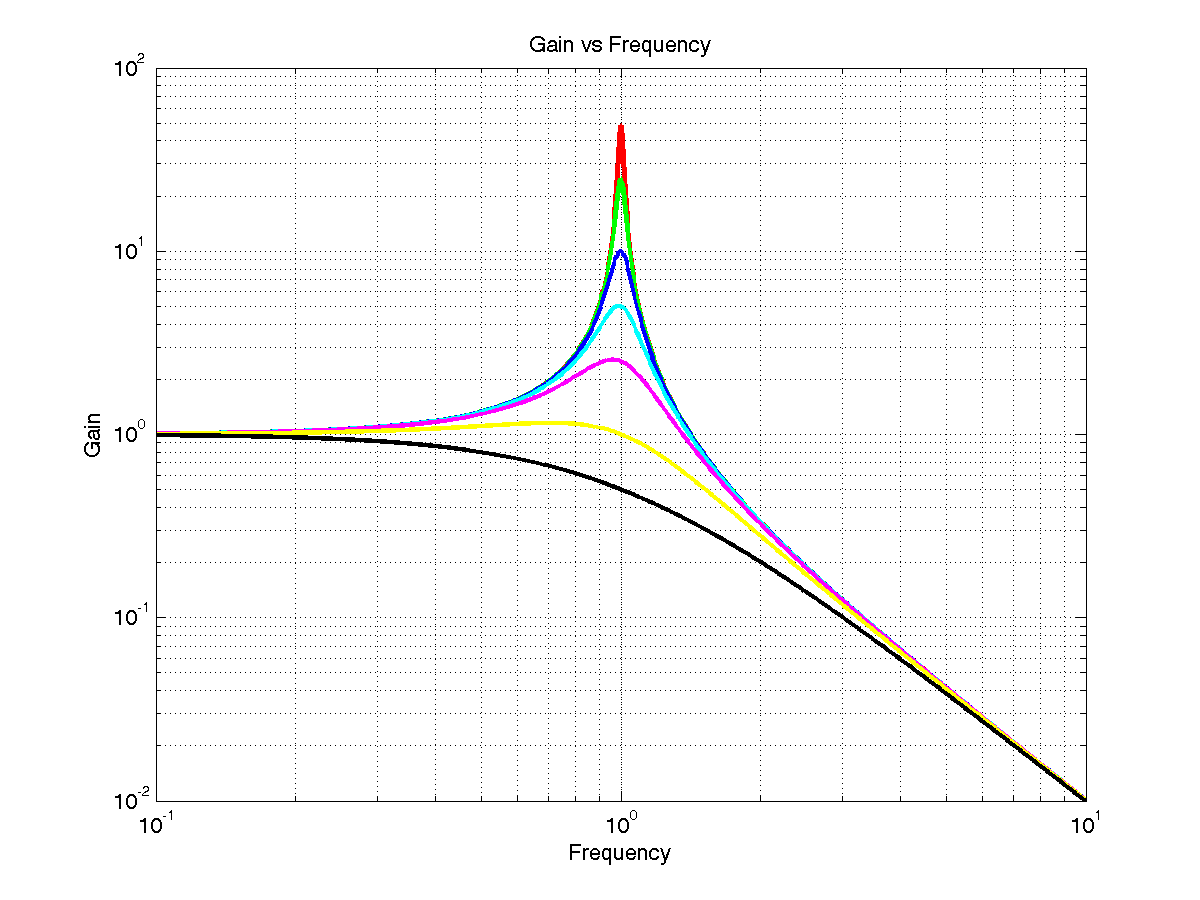

In [28]:
%%matlab

close all

% Create a set of values for the damping factor
zeta = [0.01 .02 0.05 0.1 .2 .5 1 ];

% Define a color for each damping factor
colors = ['r' 'g' 'b' 'c' 'm' 'y' 'k'];

% Create a range of frequency values equally spaced logarithmically
w = logspace(-1, 1, 1000);

% Plot the gain vs. frequency for each of the seven damping factors
figure;
for i = 1:7
    a = w.^2 - 1;
    b = 2*w*zeta(i);
    gain = sqrt(1./(a.^2 + b.^2));
    loglog(w, gain, 'color', colors(i), 'linewidth', 2);
    hold on;
end

% Set the axis limits
axis([0.1 10 0.01 100]);

% Add a title and axis labels
title('Gain vs Frequency');
xlabel('Frequency');
ylabel('Gain');

% Turn the grid on
grid on;

% ----------------------------------------
% Let's convert the figure to plotly structures, and set stripping to false
[data, layout] = convertFigure(get(gcf), false);

% But, before we publish, let's modify and add some features:
% Naming the traces
for i=1:numel(data)
    data{i}.name =  ['$\\zeta = ' num2str(zeta(i)) '$']; %LATEX FORMATTING
    data{i}.showlegend = true;
end
% Adding a nice the legend
legendstyle = struct( ...
    'x' , 0.15, ...
    'y' , 0.9, ...
    'bgcolor' , '#E2E2E2', ...
    'bordercolor' , '#FFFFFF', ...
    'borderwidth' , 2, ...
    'traceorder' , 'normal' ...
    );
layout.legend = legendstyle;
layout.showlegend = true;

% Setting the hover mode
layout.hovermode = 'closest';

% Giving the plot a custom name
plot_name = 'My_improved_plot';

% Sending to Plotly
response = plotly(data, struct('layout', layout, ...
    'filename',plot_name, ...
	'fileopt', 'overwrite'));

display(response.url)

Which produces:

In [29]:
tls.embed('MATLAB-Demos', '4')

And you can similarly collaborate across all Plotly APIs, working on plots from IJulia, Perl, Arduino, Raspberry Pi, or Ruby. You could also append data to any figure from any API, or from the GUI. Want to make your own wrapper? Check out our [REST API](https://plot.ly/rest/). 

## IV. WebPlotDigitizer and Plotly

Let's suppose next that you wanted to plot data from a graph you loved in a [Facebook Data Science post](https://www.facebook.com/notes/facebook-data-science/mothers-day-2014/10152235539518859). 

In [30]:
Image(url = 'https://i.imgur.com/sAHsjk3.png')

You can take a screenshot, and drag and drop the image into [WebPlotDigitizer](http://arohatgi.info/WebPlotDigitizer/app/). Here's [a tutorial](http://blog.plot.ly/post/70293893434/automatically-grab-data-from-an-image-with) on using the helpful tool, which includes the handy ["Graph in Plotly"](https://plot.ly/export/) button. You can put it on your website so your users can easily access, graph, and share your data. And it links to your source.

In [31]:
Image (url = 'https://i.imgur.com/y4t5hdj.png')

I can then make and share the graph in Plotly. You could do this to access data in any images you find online, then add fits or data from the grid or APIs. Check out [our post with five fits](http://blog.plot.ly/post/84309369787/best-fit-lines-in-plotly) to see more.

In [32]:
Image (url = 'http://i.imgur.com/BUOe85E.png')

We'll add a fit then style it a bit.

In [33]:
tls.embed('MattSundquist', '1337')

## V. Revisions, embedding, and sharing

We can share it to edit collaboratively, privately or publicly.  I can share straight [into a folder](https://plot.ly/python/file-sharing) from the API. My collaborators and I can always [add, append, or extend data](https://plot.ly/python/add-append-extend) to that same plot with Python, R, or tbhe GUI. 

In [34]:
Image(url = 'http://i.imgur.com/YRyTCQy.png')

We can also save revisions and versions. 

In [35]:
Image (url = 'http://i.imgur.com/ATn7vE4.png')

You can also export your plot for presentations, emails, infographics, or publications, but link back to the online version so others can access your figure and data.

In [36]:
Image(url = 'http://i.imgur.com/QaIw9p4.png?1')

You can also stop emailing files around. Have your discussion in context in Plotly. The graph being discussed is [here](https://plot.ly/~etpinard/25/average-daily-surface-air-temperature-anomalies-in-deg-c-from-2013-12-01-to-2014/).

In [37]:
Image(url = 'http://i.imgur.com/OqXKs0r.png')

And displaying in your browser in an iframe is easy. You can copy and paste the snippet below and put it in a blog or website and get a live, interactive graph that lets your readers zoom, toggle, and get text on the hover.

In [38]:
from IPython.display import HTML

In [39]:
i = """<pre style="background:#f1f1f1;color:#000">&lt;iframe src=<span style="color:#c03030">"https://plot.ly/~MattSundquist/1334/650/550"</span> width=<span style="color:#c03030">"650"</span> height=550<span style="color:#c03030">" frameBorder="</span>0<span style="color:#c03030">" seamless="</span>seamless<span style="color:#c03030">" scrolling="</span>no<span style="color:#c03030">">&lt;/iframe>
</span></pre>"""

In [40]:
h = HTML(i); h

It's also interactive, even when embedded.

In [41]:
HTML('<br><center><iframe class="vine-embed" src="https://vine.co/v/Mvzin6HZzLB/embed/simple" width="600" height="600" frameborder="0"></iframe><script async src="//platform.vine.co/static/scripts/embed.js" charset="utf-8"></script></center><br>')

Your profile keeps all your graphs and data together like this https://plot.ly/~jackp/. 

In [42]:
Image(url='https://i.imgur.com/gUC4ajR.png')

Plotly also does content. Check out our's posts on [boxplots](https://plotly/boxplots) or [histograms](https://plot.ly/histograms).

In [43]:
HTML('<center><iframe class="vine-embed" src="https://vine.co/v/M6JBhdiqPqA/embed/simple" width="600" height="600" frameborder="0"></iframe><script async src="//platform.vine.co/static/scripts/embed.js" charset="utf-8"></script></center>')

## VI. Streaming Graphs

You can stream data into Plotly. That means you could publish your results to anyone in the world by streaming it through Plotly. You could also send data from multiple sources and languages, and keep your data around to analyze and publish it.

In [44]:
tls.embed('flann321', '9')

Or you can even stream in real-time. Check out a [Notebook here](https://plot.ly/python/streaming-tutorial/) or see our [Raspberry Pi Instructable](http://www.instructables.com/id/Plotly-Atlas-Scientific-Graph-Real-Time-Dissolved-/) showing real-time dissolved oxygen.

In [45]:
tls.embed('streaming-demos','4')

You can stream from basically anywhere.

In [46]:
HTML('<center><iframe src="//instagram.com/p/nJkMMQRyvS/embed/" width="612" height="710" frameborder="0" scrolling="no" allowtransparency="true"></iframe></center>')

In [1]:
from IPython.display import display, HTML

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="http://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install publisher --upgrade
import publisher
publisher.publish(
    'collaborate.ipynb', 'ipython-notebooks/collaboration/', 'Collaboration with Plotly using Python, R and MATLAB', 
    'An IPython Notebook showing how to collaboration between different programming languages with plotly',
     name='Collaboration with Plotly')

Requirement already up-to-date: publisher in /Users/chelsea/venv/venv2.7/lib/python2.7/site-packages


/Users/chelsea/venv/venv2.7/lib/python2.7/site-packages/IPython/nbconvert.py:13: ShimWarning: The `IPython.nbconvert` package has been deprecated since IPython 4.0. You should import from nbconvert instead.
  "You should import from nbconvert instead.", ShimWarning)
/Users/chelsea/venv/venv2.7/lib/python2.7/site-packages/publisher/publisher.py:53: UserWarning: Did you "Save" this notebook before running this command? Remember to save, always save.
  warnings.warn('Did you "Save" this notebook before running this command? '
